<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_challenge_W5D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness

Saving kaggle.json to kaggle.json
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 57.9MB/s]


In [2]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the World Happiness Report dataset for the year 2019
df_2019 = pd.read_csv('2019.csv')

# Examine the structure and contents of the dataset for the year 2019
print("Structure and contents of the dataset for the year 2019:")
# print(df_2019.info())
print(df_2019.head())
print(df_2019.columns)

Structure and contents of the dataset for the year 2019:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                     

In [5]:
# Data preprocessing: Address missing values and adjust data types
# Check for missing values
print("\nMissing values in the dataset:")
print(df_2019.isnull().sum())


Missing values in the dataset:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


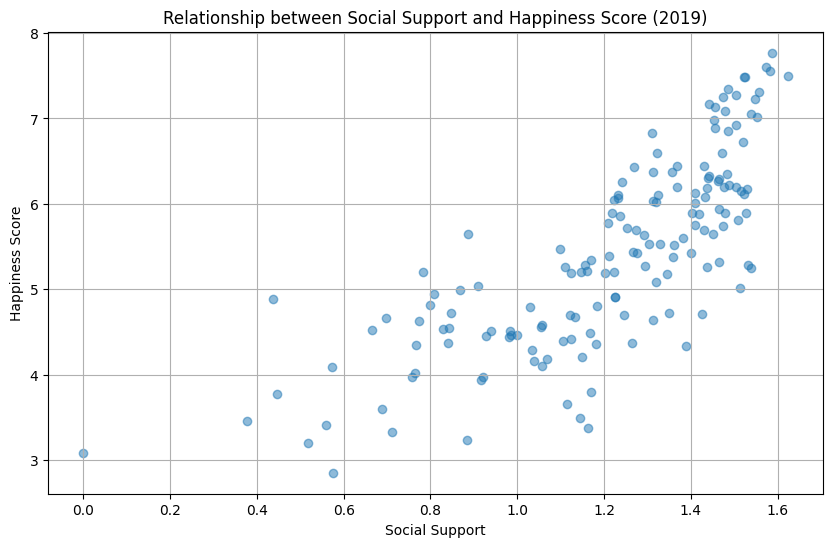

In [8]:
# Social Support and Happiness: Scatter plot to investigate the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df_2019['Social support'], df_2019['Score'], alpha=0.5)
plt.title('Relationship between Social Support and Happiness Score (2019)')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


In [19]:
# Regional Comparisons of GDP and Health: Subplots for GDP per Capita and Healthy Life Expectancy
regions = df_2019['Country or region'].unique()
num_subplots = len(regions)
print(num_subplots)
print(regions)

156
['Finland' 'Denmark' 'Norway' 'Iceland' 'Netherlands' 'Switzerland'
 'Sweden' 'New Zealand' 'Canada' 'Austria' 'Australia' 'Costa Rica'
 'Israel' 'Luxembourg' 'United Kingdom' 'Ireland' 'Germany' 'Belgium'
 'United States' 'Czech Republic' 'United Arab Emirates' 'Malta' 'Mexico'
 'France' 'Taiwan' 'Chile' 'Guatemala' 'Saudi Arabia' 'Qatar' 'Spain'
 'Panama' 'Brazil' 'Uruguay' 'Singapore' 'El Salvador' 'Italy' 'Bahrain'
 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Uzbekistan' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Thailand' 'Latvia' 'South Korea' 'Estonia' 'Jamaica'
 'Mauritius' 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary'
 'Paraguay' 'Northern Cyprus' 'Peru' 'Portugal' 'Pakistan' 'Russia'
 'Philippines' 'Serbia' 'Moldova' 'Libya' 'Montenegro' 'Tajikistan'
 'Croatia' 'Hong Kong' 'Dominican Republic' 'Bosnia and Herzegovina'
 'Turkey' 'Malaysia' 'Belarus' 'Greece' 'Mongolia' 'North Macedonia'
 'Nigeria' 'Kyrgyzs

In [16]:
# Adjust grid size based on the number of subplots
num_cols = 3
num_rows = (num_subplots - 1) // num_cols + 1

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

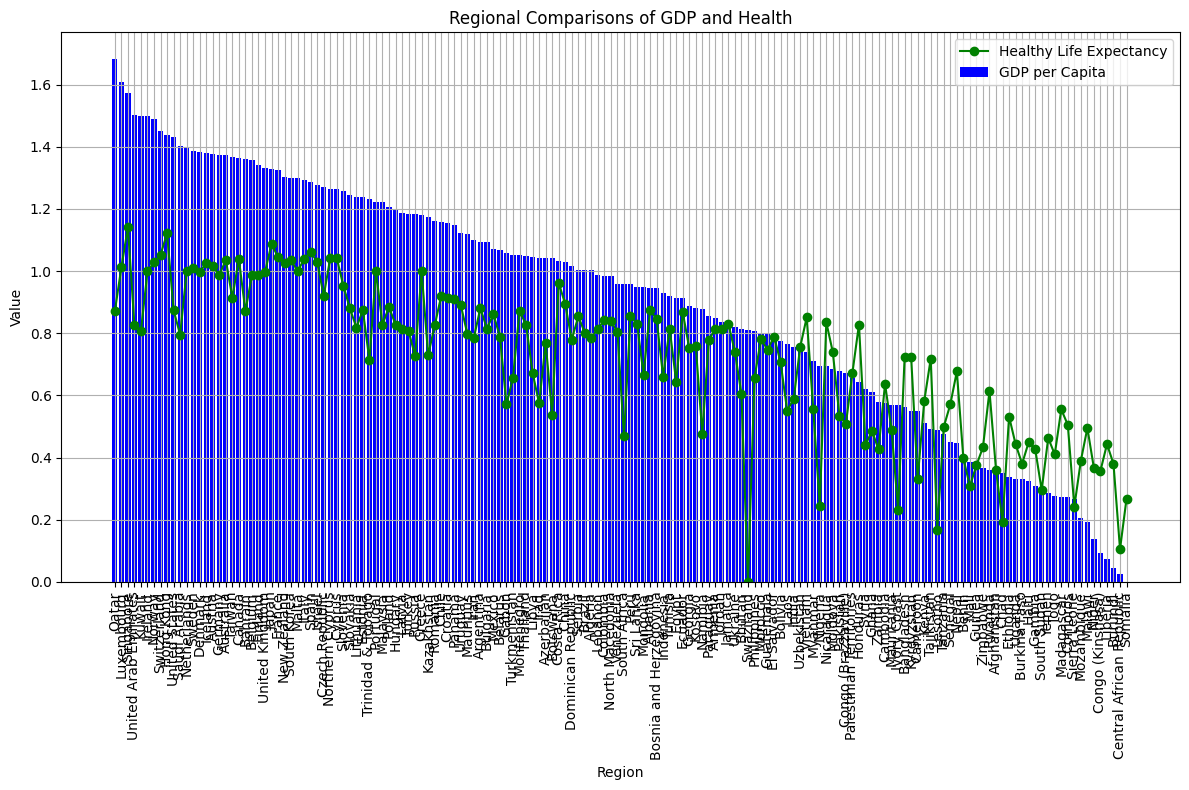

In [31]:
# Group the data by region and calculate the average GDP per Capita and Healthy Life Expectancy
region_data = df_2019.groupby('Country or region')[['GDP per capita', 'Healthy life expectancy']].mean()

# Sort the data by GDP per Capita for better visualization
region_data = region_data.sort_values(by='GDP per capita', ascending=False)

# Create a Matplotlib subplot
plt.figure(figsize=(12, 8))

# Bar plot for GDP per Capita
plt.bar(region_data.index, region_data['GDP per capita'], color='blue', label='GDP per Capita')

# Line plot for Healthy Life Expectancy
plt.plot(region_data.index, region_data['Healthy life expectancy'], marker='o', color='green', label='Healthy Life Expectancy')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Regional Comparisons of GDP and Health')
plt.xticks(rotation=90)
plt.grid(True)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
!pip install country_converter
import country_converter as coco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00


In [39]:
# Create a mapping of countries to continents
cc = coco.CountryConverter()
country_to_continent = cc.convert(names=df_2019['Country or region'], to='continent')

# Add the 'Continent' column to your DataFrame
df_2019['Continent'] = country_to_continent

# Print the DataFrame to view the results
print(df_2019)

     Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1  

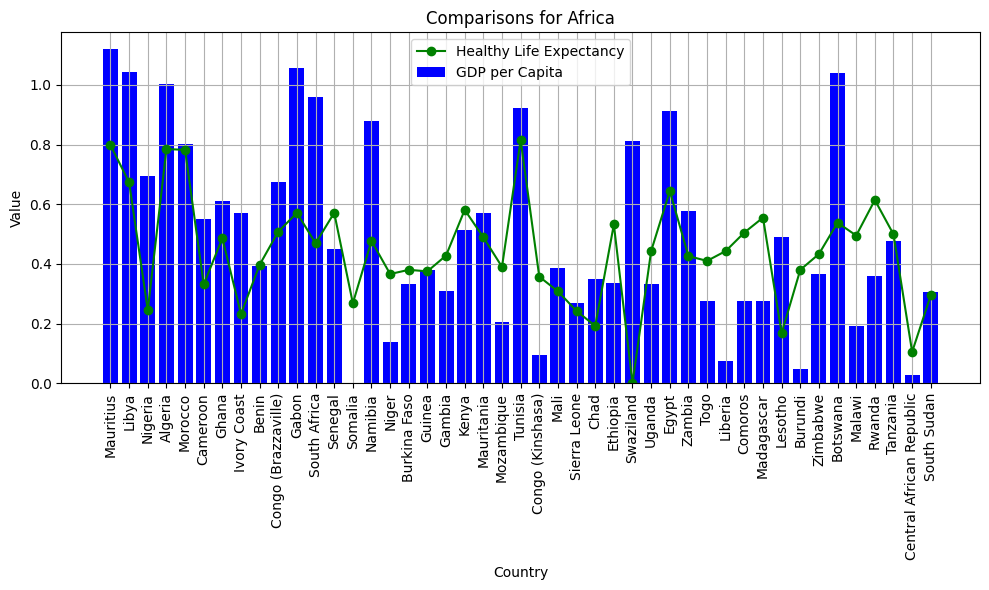

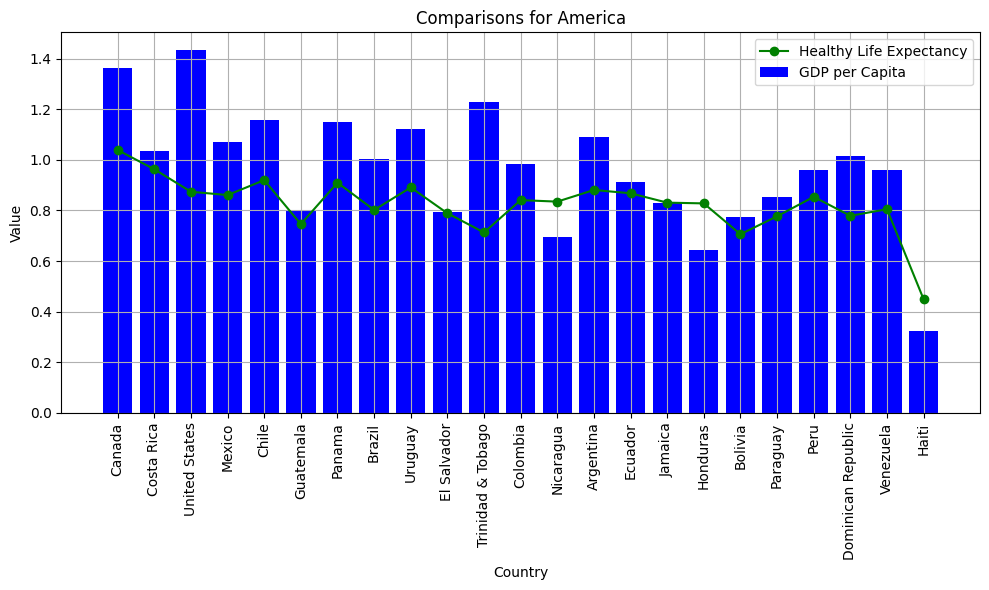

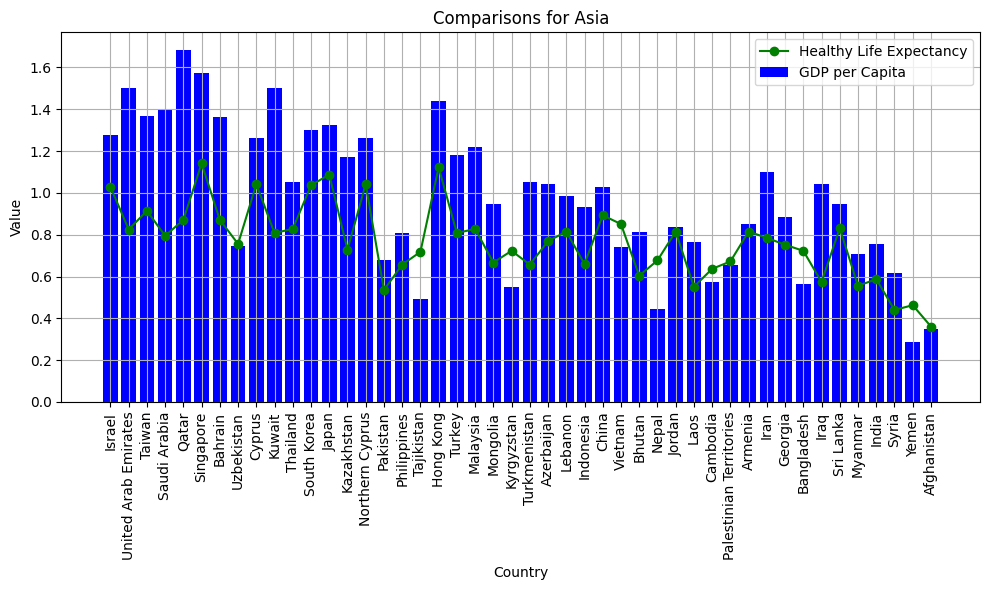

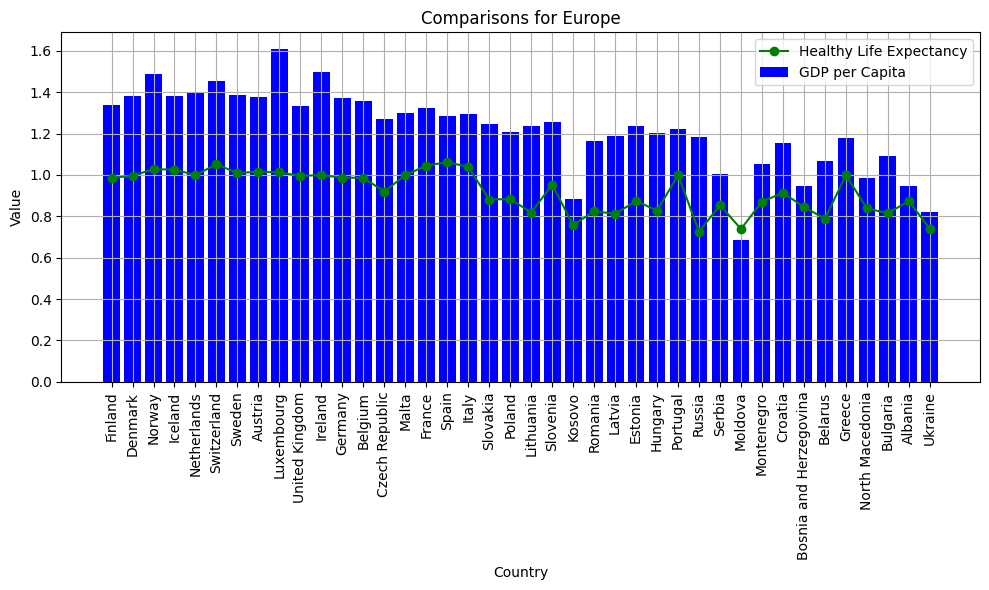

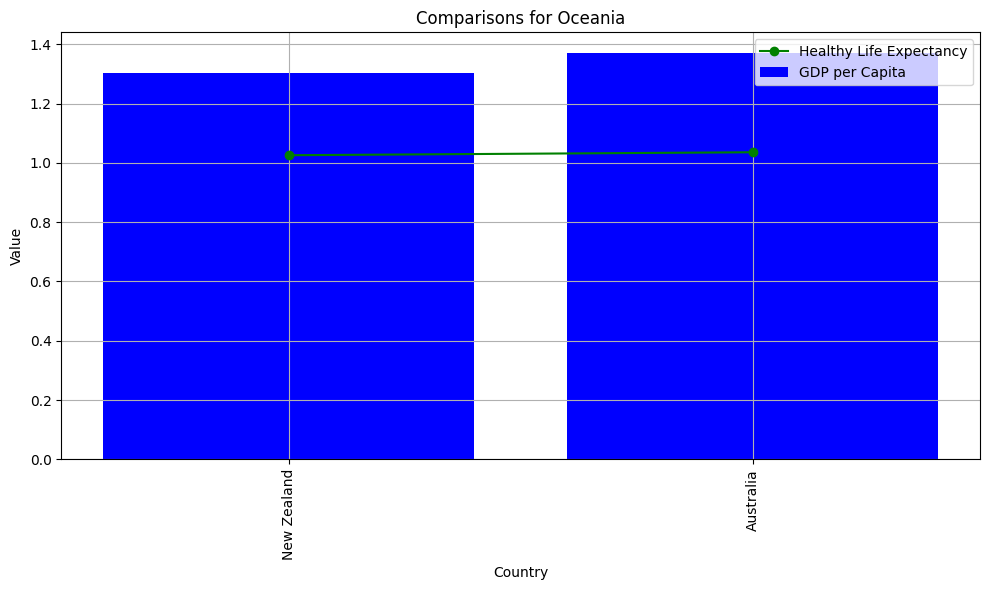

In [40]:
# Group the data by continent
grouped = df_2019.groupby('Continent')

# Plot comparisons for each continent
for continent, data in grouped:
    plt.figure(figsize=(10, 6))
    plt.bar(data['Country or region'], data['GDP per capita'], color='blue', label='GDP per Capita')
    plt.plot(data['Country or region'], data['Healthy life expectancy'], marker='o', color='green', label='Healthy Life Expectancy')
    plt.title(f'Comparisons for {continent}')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

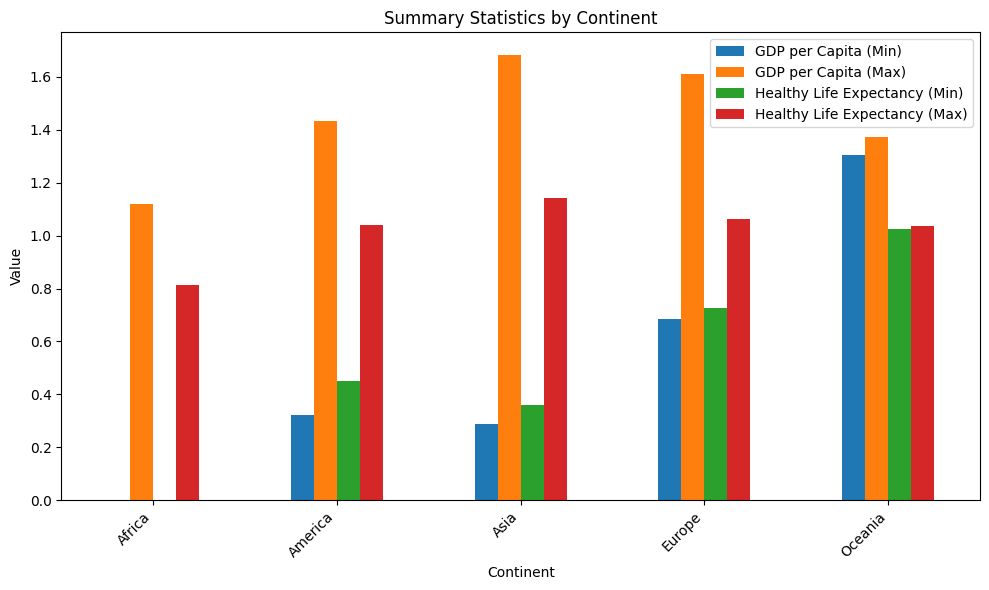

In [41]:
# Calculate minimum and maximum values for each continent
summary_stats = grouped.agg({'GDP per capita': ['min', 'max'], 'Healthy life expectancy': ['min', 'max']})

# Plot summary statistics for each continent
plt.figure(figsize=(10, 6))
summary_stats.plot(kind='bar', ax=plt.gca())
plt.title('Summary Statistics by Continent')
plt.xlabel('Continent')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(['GDP per Capita (Min)', 'GDP per Capita (Max)', 'Healthy Life Expectancy (Min)', 'Healthy Life Expectancy (Max)'])
plt.tight_layout()
plt.show()